In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix,classification_report
from sklearn import metrics

from sklearn.model_selection import train_test_split # splitting the data
from sklearn.tree import plot_tree # tree diagram


In [2]:
df = pd.read_csv("./healthcare-dataset-stroke-data.csv",sep=",")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [4]:
df = df.drop('id',axis=1)

In [5]:
df.nunique()

gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

In [6]:
df['bmi'].fillna(df['bmi'].mean(), inplace=True)

In [7]:
df['gender']=df['gender'].replace('Other','Male')

In [8]:
len(df.loc[df['stroke']==0]) #No Stroke

4861

In [9]:
len(df.loc[df['stroke']==1])

249

In [10]:
# Convert Marrital Status, Residence and Gender into 0's and 1's
df["Residence_type"] = df["Residence_type"].apply(lambda x: 1 if x=="Urban" else 0)
df["ever_married"] = df["ever_married"].apply(lambda x: 1 if x=="Yes" else 0)

In [11]:
# Import label encoder
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['gender']= encoder.fit_transform(df['gender'])
df['work_type']= encoder.fit_transform(df['work_type'])
df['smoking_status']= encoder.fit_transform(df['smoking_status'])
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1


In [12]:
df.dtypes

gender                 int32
age                  float64
hypertension           int64
heart_disease          int64
ever_married           int64
work_type              int32
Residence_type         int64
avg_glucose_level    float64
bmi                  float64
smoking_status         int32
stroke                 int64
dtype: object

<AxesSubplot:title={'center':'bmi'}, xlabel='gender'>

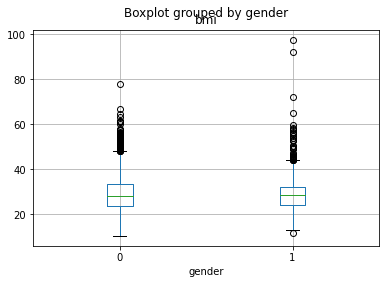

In [13]:
df.boxplot(column="bmi",by = "gender")


In [14]:
no_stroke = df.loc[df["stroke"]==0]
samp_no_stroke = no_stroke.sample(n=1417)
samp_no_stroke

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
4081,1,40.0,0,0,1,2,0,64.84,26.6,2,0
1740,0,38.0,1,0,1,2,1,137.94,41.8,2,0
4548,1,49.0,0,0,1,2,0,58.42,32.8,1,0
2082,0,48.0,0,1,0,2,0,101.89,25.1,3,0
4075,0,8.0,0,0,0,4,0,102.50,16.3,0,0
...,...,...,...,...,...,...,...,...,...,...,...
4581,0,0.4,0,0,0,4,0,85.65,17.4,0,0
1065,1,67.0,0,0,1,0,1,67.79,26.0,1,0
311,0,79.0,0,0,1,2,1,97.93,31.2,0,0
2458,0,57.0,0,0,1,2,0,131.40,32.3,2,0


In [15]:
stroke= df.loc[df["stroke"]==1]
stroke

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1
...,...,...,...,...,...,...,...,...,...,...,...
244,1,57.0,0,0,1,2,0,84.96,36.700000,0,1
245,0,14.0,0,0,0,4,0,57.93,30.900000,0,1
246,0,75.0,0,0,1,3,0,78.80,29.300000,1,1
247,1,71.0,1,0,1,3,0,87.80,28.893237,0,1


In [16]:
# Splitting data
from sklearn.model_selection import train_test_split
X = df.drop('stroke', axis=1)
y = df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)
X_train.shape, X_test.shape

((3832, 10), (1278, 10))

In [17]:
X_train

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
3451,0,42.0,0,0,1,2,0,80.00,27.5,2
1547,1,59.0,0,1,1,3,0,194.98,30.4,0
205,0,78.0,0,0,1,2,1,106.74,33.0,1
1995,1,71.0,1,0,1,2,0,186.95,33.3,2
4707,0,61.0,0,0,1,2,0,106.65,35.9,1
...,...,...,...,...,...,...,...,...,...,...
642,1,61.0,0,0,1,2,0,214.05,29.4,1
3205,1,26.0,0,0,1,3,1,73.72,25.9,3
2894,0,44.0,0,0,1,2,0,97.27,26.0,2
4229,0,27.0,0,0,0,2,1,61.80,26.8,1


In [37]:
from sklearn.utils import resample

# splitting the classes
train = X_train.copy()
train['stroke'] = y_train
stroke = train[(train.stroke == 1)]
not_stroke = train[(train.stroke == 0)]

# n_sample parameter - match the minority class, sample() shuffles the rows
not_stroke_downsampled = resample(not_stroke, replace=False, n_samples=1417, random_state= 42)
train_downsampled = pd.concat([not_stroke_downsampled, stroke]).sample(frac=1)
train_downsampled.stroke.value_counts()
downsampled_y = train_downsampled['stroke']
downsampled_X = train_downsampled.drop('stroke', axis=1)
X_train_rs, X_test_rs, y_train_rs , y_test_rs = train_test_split(downsampled_X,downsampled_y, test_size = 0.25, random_state = 42)
X_train_rs.shape, X_test_rs.shape

((1210, 10), (404, 10))

In [19]:
train_downsampled.stroke.value_counts()

0    1417
1     197
Name: stroke, dtype: int64

In [20]:
no_stroke = not_stroke_downsampled
stroke = train_downsampled
df1 = pd.DataFrame(no_stroke)
df2 = pd.DataFrame(stroke)

newdf = df1.merge(df2, how='right')

In [21]:
newdf.head()
newdf.info()
newdf.to_csv('resampling.csv', header=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1614 entries, 0 to 1613
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             1614 non-null   int64  
 1   age                1614 non-null   float64
 2   hypertension       1614 non-null   int64  
 3   heart_disease      1614 non-null   int64  
 4   ever_married       1614 non-null   int64  
 5   work_type          1614 non-null   int64  
 6   Residence_type     1614 non-null   int64  
 7   avg_glucose_level  1614 non-null   float64
 8   bmi                1614 non-null   float64
 9   smoking_status     1614 non-null   int64  
 10  stroke             1614 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 151.3 KB


In [22]:
new_df = pd.read_csv("./resampling.csv",sep=",")

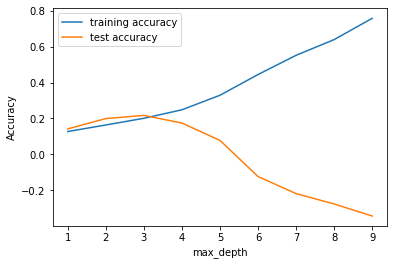

In [23]:
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 10
depth = range(1, 10)
for n in depth:
    # fit the model
    tree = DecisionTreeRegressor(max_depth=n)
    tree.fit(X_train_rs, y_train_rs)
    # record training set accuracy
    training_accuracy.append(tree.score(X_train_rs, y_train_rs))
    # record generalization accuracy
    test_accuracy.append(tree.score(X_test_rs, y_test_rs))

#plotting the training & testing accuracy for max_depth from 1 to 10
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("max_depth")
plt.legend()

In [35]:
tree_up = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       random_state=1, splitter='best')
tree_up.fit(X_train_rs,y_train_rs)
pred_up = tree_up.predict(X_test_rs)
#prediction on the known test set
print("Precision: ", metrics.precision_score(y_test_rs,pred_up))
print("Accuracy: ", metrics.accuracy_score(y_test_rs,pred_up))
print("Classification report: ")
print(metrics.classification_report(y_test_rs,pred_up))
print("")
print("Confusion matrix: ")
print(metrics.confusion_matrix(y_test_rs,pred_up))

Precision:  0.3333333333333333
Accuracy:  0.8737623762376238
Classification report: 
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       360
           1       0.33      0.16      0.22        44

    accuracy                           0.87       404
   macro avg       0.62      0.56      0.57       404
weighted avg       0.84      0.87      0.85       404


Confusion matrix: 
[[346  14]
 [ 37   7]]


In [36]:

y_pred_rs = tree_up.predict(X_test_rs)
print(confusion_matrix(y_test_rs,y_pred_rs))
print('The classification report is:\n{:}'.format(classification_report(y_test_rs,y_pred_rs)))

[[346  14]
 [ 37   7]]
The classification report is:
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       360
           1       0.33      0.16      0.22        44

    accuracy                           0.87       404
   macro avg       0.62      0.56      0.57       404
weighted avg       0.84      0.87      0.85       404



In [26]:


# instantiate the model 
tree = DecisionTreeRegressor(max_depth=2)
# fit the model 
tree.fit(X_train_rs, y_train_rs)

#predicting the target value from the model for the samples
y_test_tree = tree.predict(X_test_rs)
y_train_tree = tree.predict(X_train_rs)

#computing the accuracy of the model performance
acc_train_tree = tree.score(X_train_rs, y_train_rs)
acc_test_tree = tree.score(X_test_rs, y_test_rs)

#computing root mean squared error (RMSE)
rmse_train_tree = np.sqrt(mean_squared_error(y_train_rs, y_train_tree))
rmse_test_tree = np.sqrt(mean_squared_error(y_test_rs, y_test_tree))

print("Decision Tree: Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree: Accuracy on test Data: {:.3f}".format(acc_test_tree))
print('\nDecision Tree: The RMSE of the training set is:', rmse_train_tree)
print('Decision Tree: The RMSE of the testing set is:', rmse_test_tree)

Decision Tree: Accuracy on training Data: 0.163
Decision Tree: Accuracy on test Data: 0.199

Decision Tree: The RMSE of the training set is: 0.2916821252896674
Decision Tree: The RMSE of the testing set is: 0.3138302287033985


In [27]:

clf = DecisionTreeClassifier(max_depth = 2, 
                             random_state = 0)
clf.fit(X_train_rs, y_train_rs)



DecisionTreeClassifier(max_depth=2, random_state=0)

In [28]:
plt.figure(figsize=(20, 10))
tree.plot_tree(clf, 
               filled=True, rounded=True, 
               feature_names = X_train_rs.columns,
               class_names = ['Stroke','No Stroke'],
               fontsize=12)

AttributeError: 'DecisionTreeRegressor' object has no attribute 'plot_tree'

<Figure size 1440x720 with 0 Axes>

In [ ]:
fig =tree_up.fit(X_train_rs, y_train_rs)

In [ ]:
feature_names = df.columns[:10]
target_names = df['stroke'].unique().tolist()

plot_tree(clf, 
          feature_names = feature_names, 
          class_names = target_names, 
          filled = True, 
          rounded = True)

plt.savefig('tree_visualization.png')


In [ ]:
# Step 1: Import the model you want to use
# This was already imported earlier in the notebook so commenting out
#from sklearn.tree import DecisionTreeClassifier
# Step 2: Make an instance of the Model
clf = DecisionTreeClassifier(max_depth = 2, 
                             random_state = 1)
# Step 3: Train the model on the data
clf.fit(X_train_rs, y_train_rs)


In [ ]:
y_pred_rs = clf_gini.predict(X_test_rs)
print(confusion_matrix(y_test_rs,y_pred_rs))
print('The classification report is:\n{:}'.format(classification_report(y_test_rs,y_pred_rs)))

In [ ]:
sns.pairplot(data=df,hue='stroke')